# Big data course 
@Liubov, Marc

Network theory and applications.

# Network generation
Most of the materials are described in the networkx documentation https://networkx.github.io/documentation/stable/reference/generators.html 

## Three ways of loading a network:
1. load a ready network example from networkx library: e.g. complete graph 
2. load network from an abstract adjacency matrix or edges/nodes list 
3. load networks from data file (see networks_from_files) notebook


When we work with networkx we already use already created Graph class, we won't do our own classes, while you can do this with Data4Sci: https://github.com/DataForScience/Networks 

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# 1. load a ready network examples 

Examples from from networkx library

Types of networks
We start we several classes of random networks. The simplest one is complete graph. 

It automaticaly makes network generation and plots it
        a. We first generate a network using networkx classes
        b. Then we visualise this network with the simplest function "draw" https://networkx.github.io/documentation/stable/reference/drawing.html 

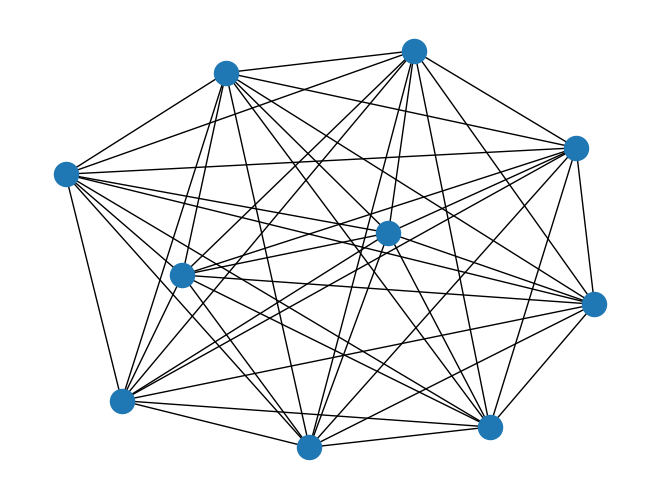

In [2]:
# 1. Generate a network
N=10
G = nx.complete_graph(N)

# 2. Draw using the preassigned layout
nx.draw(G)



## Explore other types of networks
Networkx classes
https://networkx.github.io/documentation/stable/reference/generators.html 

Other pre-assigned network classes return:

1. balanced_tree(r, h[, create_using]), the perfectly balanced r-ary tree of height h.
2. barbell_graph(m1, m2[, create_using]), the Barbell Graph: two complete graphs connected by a path.
3. binomial_tree(n), the Binomial Tree of order n.
4. complete_graph(n[, create_using]), the complete graph K_n with n nodes.
5. complete_multipartite_graph(*subset_sizes), the complete multipartite graph with the specified subset sizes.
6. circular_ladder_graph(n[, create_using]), the circular ladder graph \(CL_n\) of length n.
7. circulant_graph(n, offsets[, create_using]), the circulant graph \(Ci_n(x_1, x_2, ..., x_m)\) with \(n\) vertices.
8. cycle_graph(n[, create_using]), the cycle graph \(C_n\) of cyclically connected nodes.
9. dorogovtsev_goltsev_mendes_graph(n[, …]), the hierarchically constructed Dorogovtsev-Goltsev-Mendes graph.
10. empty_graph([n, create_using, default]), the empty graph with n nodes and zero edges.
11. full_rary_tree(r, n[, create_using]), a full r-ary tree of n vertices.
12. ladder_graph(n[, create_using]), the Ladder graph of length n.
13. lollipop_graph(m, n[, create_using]), the Lollipop Graph; K_m connected to P_n.
14. path_graph(n[, create_using]),  the Path graph P_n of linearly connected nodes.
15. star_graph(n[, create_using]), the star graph
16. trivial_graph([create_using]), the Trivial graph with one node (with label 0) and no edges.
17. turan_graph(n, r), the Turan Graph
18. wheel_graph(n[, create_using]), the wheel graph



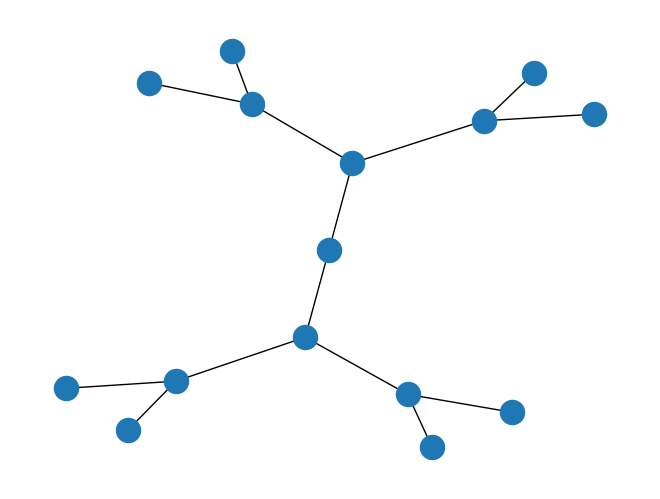

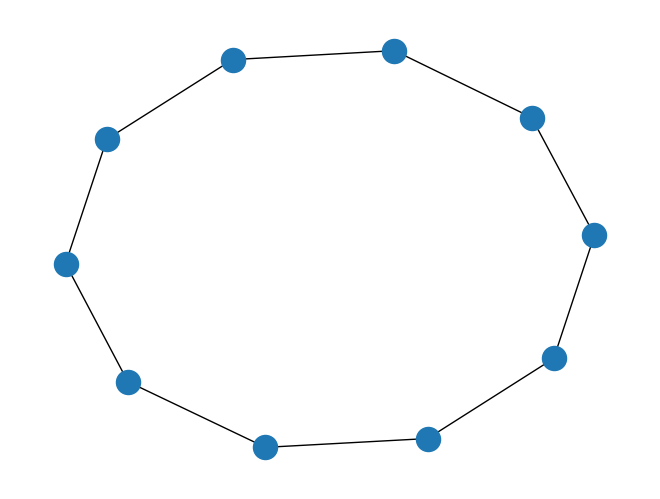

In [ ]:
import networkx as nx
r = 2
h = 3
G = nx.balanced_tree(r, h)
nx.draw(G)
plt.show()

n = 10 
G = nx.cycle_graph(n)
nx.draw(G)
plt.show()

n=50
G = nx.dorogovtsev_goltsev_mendes_graph(n)
nx.draw(G)
plt.show()

In [ ]:
n = 15 
k = 2
p = 0.1

G_ws = nx.watts_strogatz_graph(n, k, p)
nx.draw(G_ws)

# Drawing networks 

Ok nice, now that you can generate your networks let us first try to make attributes to help us to look networks more distinctly. E.g. based on the degree.

In [ ]:
from operator import itemgetter
import matplotlib.pyplot as plt
import networkx as nx

# Create a graph - use seed for reproducibility
n = 100
m = 2
seed = 20532
G = nx.barabasi_albert_graph(n, m, seed=seed)

# find node with largest degree
node_and_degree = G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

# Create ego graph of main hub
hub_ego = nx.ego_graph(G, largest_hub)

# Draw graph
pos = nx.spring_layout(hub_ego, seed=seed)  # Seed layout for reproducibility
nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=False)

# Draw ego as large and red
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.show()

## Random network generation
You can find many different ways of network generations in networkx documentation https://networkx.github.io/documentation/stable/auto_examples/index.html 

Below Erdős-Rényi graph or a binomial graph is shown. 
The $G_{n,p}$ model chooses each of the possible edges with probability $p$.


More about random networks you can read here: 
https://en.wikipedia.org/wiki/Random_graph

We also explain it later in the course slides: https://github.com/Big-data-course-CRI/materials_big_data_cri_2019/tree/master/slides

You can also use resources from Barabasi book on network science: http://networksciencebook.com/


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


#G_rg = nx.random_geometric_graph(500, 0.1)
n=15 
p1=0.2
G_er = nx.erdos_renyi_graph(n, p1) #nx.gnp_random_graph(100, 0.02)

#fig, ax = plt.subplots(1, 1, figsize=(8, 6));
#nx.draw(G_er)

degree_sequence = sorted([d for n, d in G_er.degree()], reverse=True)
# print "Degree sequence", degree_sequence
dmax = max(degree_sequence)
plt.plot(degree_sequence, 'b-', marker='o')
plt.title("Degree rank linear plot")
plt.ylabel("degree")
plt.xlabel("rank")


# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G_er.subgraph(sorted(nx.connected_components(G_er), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

plt.show()


degree_sequence = sorted([d for n, d in G_er.degree()], reverse=True)
# print "Degree sequence", degree_sequence
dmax = max(degree_sequence)
plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank loglog plot")
plt.ylabel("degree")
plt.xlabel("rank")


# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G_er.subgraph(sorted(nx.connected_components(G_er), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
plt.show()




In [ ]:

import networkx as nx
import matplotlib.pyplot as plt


n = 100
m = 10
G = nx.barabasi_albert_graph(n, m, seed=None, initial_graph=None)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
# print "Degree sequence", degree_sequence
dmax = max(degree_sequence)


plt.plot(degree_sequence, 'b-', marker='o')
plt.title("Degree rank linear plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

plt.show()


plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank loglog plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

plt.show()

In [ ]:
n= 100
G = nx.random_powerlaw_tree(n, gamma=3)


plt.plot(degree_sequence, 'b-', marker='o')
plt.title("Degree rank linear plot power law tree")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

plt.show()


plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank loglog plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

plt.show()


# Karate club network

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()
print("Node Degree")
for v in G:
    print(f"{v:4} {G.degree(v):6}")




nx.draw(G, with_labels=True)
plt.show()

nx.draw_circular(G, with_labels=True)
plt.show()

# Try yourself

Generate your own network.

You can also create your own network by 
1. giving to networkx a matrix or edgelist, or adding nodes and links.
2. generating it using predefined network classes

Use the algorithm
1. We first generate a network using matrix, edgelist or load function.
2. Then we visualise this network with the simplest function "draw" https://networkx.github.io/documentation/stable/reference/drawing.html



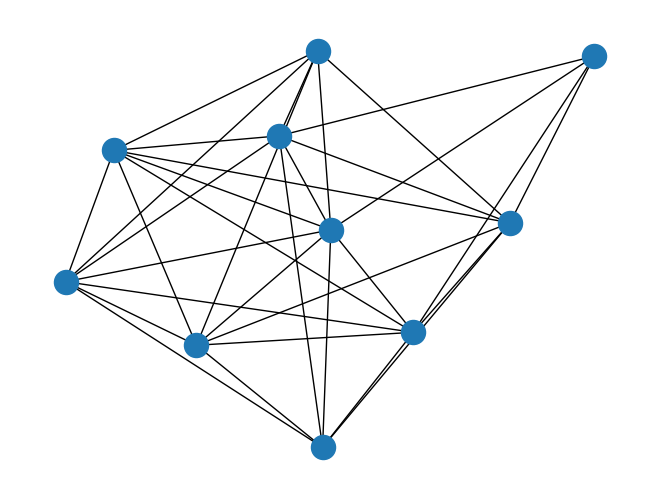

In [14]:
#loading network from a random matrix

import numpy as np
import networkx as nx

n = 10

A = np.ones((n,n))

for i in range(n):
    
    A[i,i] = 0

for i in range(n):
    
    for j in range(n):
        
        if i!=j:
            
            A[i,j] = choice([0,1])


G = nx.from_numpy_array(A)

nx.draw(G)

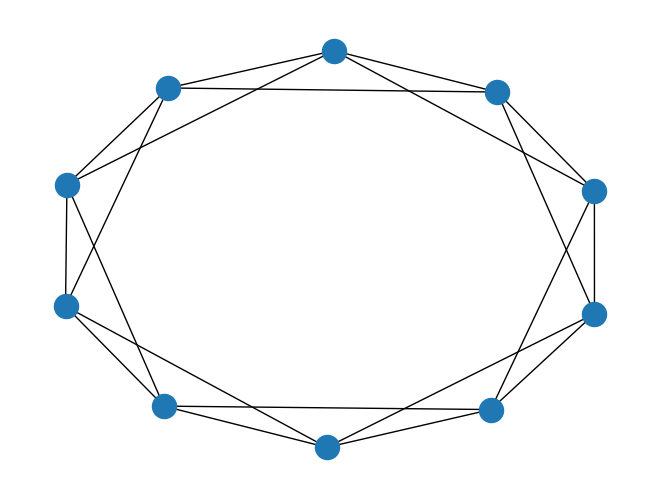

In [20]:
# Generating from predifined class

G = nx.circulant_graph(10, [1, 2])

nx.draw(G)